In [25]:
import numpy as np

class LinearRegression:

  def __init__(self,lr=0.01,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weight = None
    self.bias = None

  def fit(self,X,y):
    n_samples,n_features = X.shape
    self.weight = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X,self.weight)+self.bias    #np.dot() -> summation of all dot products

      dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
      db = (1/n_samples)*np.sum(y_pred-y)

      self.weight -=self.lr*dw
      self.bias  -=self.lr*db



  def predict(self,X):
    y_pred = np.dot(X,self.weight)+self.bias
    return y_pred








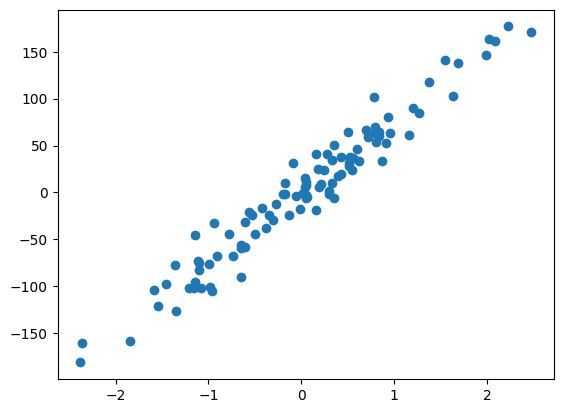

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
X,y = make_regression(
    n_samples=100,
    n_features =1,    #change for multilinear
    noise=20,
    random_state=4
)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

plt.scatter(X[:,0],y)
plt.show()


In [31]:
def mse(y_test,predictions):
  return np.mean((y_test-predictions)**2)




lr = LinearRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

mse = mse(y_test,predictions)
mse

166.83620731658397

In [32]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2


print(r2score(predictions,y_test))

0.9585246488134623


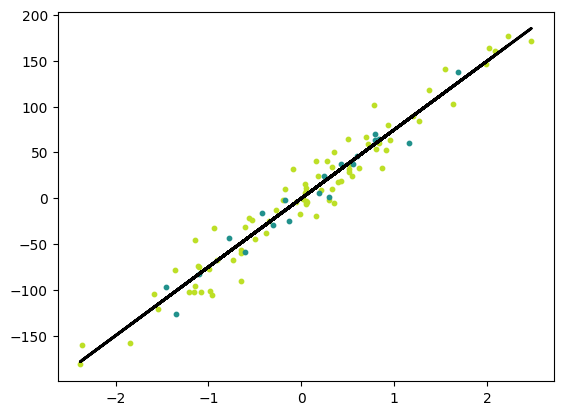

In [33]:
y_pred_line = lr.predict(X)
cmap = plt.get_cmap('viridis')
m1= plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2= plt.scatter(X_test,y_test,color=cmap(0.5),s=10)

plt.plot(X,y_pred_line,color='black',linewidth=2,label='Prediction')

plt.show()